# Undersampling (subamostrados)

# Carregando bibliotecas

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando dataset

In [2]:
tweets_df = pd.read_csv('')
tweets_df.head(4)

,id,hashtag,votes,hard,sentiment,group,text,repeat
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,que coisa linda O programa estava mostrando um...,False
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,por mais com as irmãs galvão adorei elas,False
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,1,test,mr CATRA USERNAME lançando sua nova música PPK...,False
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,0,test,quem viu aquela lutadora modela barbuda tatuad...,False


# Análise exploratória de dados (EDA)

## Eliminando as colunas que não serão utilizada

In [3]:
tweets_df.columns

Index(['id', 'hashtag', 'votes', 'hard', 'sentiment', 'group', 'text',
       'repeat'],
      dtype='object')

In [4]:
tweets_df.drop(columns=['id', 'hashtag', 'votes', 'hard', 'group', 'repeat'], inplace=True)

tweets_df.head()

,sentiment,text
0,1,que coisa linda O programa estava mostrando um...
1,1,por mais com as irmãs galvão adorei elas
2,1,mr CATRA USERNAME lançando sua nova música PPK...
3,0,quem viu aquela lutadora modela barbuda tatuad...
4,-1,tô passada com esse cara quanta merda pode sai...


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15047 entries, 0 to 15046
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15047 non-null  object
 1   text       15047 non-null  object
dtypes: object(2)
memory usage: 235.2+ KB


In [6]:
tweets_df.groupby(['sentiment']).count()

,text
sentiment,
-,47
-1,4426
0,3926
1,6648


In [7]:
# removendo as linhas com a variável sentimento como traço '-'

indexNames = tweets_df[tweets_df['sentiment'] == '-' ].index #obtendo o valor para ajudar a remover a linha
tweets_df.drop(indexNames , inplace=True) #removendo a linha correspondente ao valor informado

In [8]:
# tranformando valores para adequar a os classificadores
tweets_df['sentiment'] = tweets_df['sentiment'].replace(['-1', '0', '1'], [3, 6, 9])
tweets_df['sentiment'] = tweets_df['sentiment'].replace([3, 6, 9], [0, 1, 2])

In [9]:
tweets_df.groupby(['sentiment']).count()

,text
sentiment,
0,4426
1,3926
2,6648


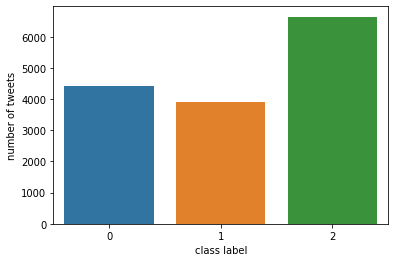

In [10]:
sns.countplot(x=tweets_df.sentiment)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

#   Limpando o texto

1. Removendo os @users do Twitter
2. Removendo as urls do texto 
3. Removendo pontuações, números e caracteres espaciais

5. Converter o texto em minusculo
6. Rovendo as Stopwords
7. Realizando Stemming nas palavras
8. Realizando Lemmatization nas palavras

In [11]:
# removendo as palavras USERNAME e NUMBER
tweets_df['text_clean'] = tweets_df['text'].str.replace('USERNAME', '').str.replace('NUMBER', '')

In [12]:
!python -m nltk.downloader stopwords

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# importando a biblioteca de processamento de linguagen natural e a de expreções regulares (regex)
import nltk
import re

# usando as funções stopword e remover os caracteres indesejados
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower() # remove url e tranforma o texto em minusculo
    instancia = re.sub(r'[0-9]+', '', instancia) # remove números
    instancia = re.sub(r'[^\w\s]','', instancia) # remove pontuação
    instancia = re.sub('[!#$%^&*()]', '', instancia) #remove caractéres espaciais
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [14]:
# remover emojis utilizado regex (re)
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [15]:
# aplicando a função de limpeza de dados:
tweets_df['text_clean'] = [Preprocessing(i) for i in tweets_df['text_clean']]
tweets_df['text_clean'] = [remove_emoji(i) for i in tweets_df['text_clean']]
tweets_df['length_tweet']=tweets_df['text_clean'].str.len()
pd.set_option('display.max_colwidth', None) 

tweets_df.head()

,sentiment,text,text_clean,length_tweet
0,2,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,coisa linda programa mostrando familia adotou adolescente anos amor,67
1,2,por mais com as irmãs galvão adorei elas,irmãs galvão adorei,19
2,2,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62
3,1,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,viu lutadora modela barbuda tatuada masterchefbr,48
4,0,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,tô passada cara quanta merda pode sair boca alguém alguns minutos,65


# Lemmatization

In [16]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-07-27 22:16:01.080827: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 38.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [17]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [18]:
tweets_df['text_lemma'] = tweets_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

In [19]:
tweets_df['text_lemma'] = [Preprocessing(i) for i in tweets_df['text_lemma']]

In [20]:
tweets_df.head()

,sentiment,text,text_clean,length_tweet,text_lemma
0,2,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,coisa linda programa mostrando familia adotou adolescente anos amor,67,coisa lindo programa mostrar familia adotar adolescente ano amor
1,2,por mais com as irmãs galvão adorei elas,irmãs galvão adorei,19,irmã galvão ador
2,2,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora
3,1,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,viu lutadora modela barbuda tatuada masterchefbr,48,ver lutadora modelar barbuda tatuar masterchefbr
4,0,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,tô passada cara quanta merda pode sair boca alguém alguns minutos,65,tô passado cara quanto merdo poder sair boca alguém algum minuto


## Lematização (outra forma)

In [21]:
!pip install simplemma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import simplemma
from simplemma import text_lemmatizer

In [23]:
# teste
teste_lemma = text_lemmatizer('Sou o intervalo entre o que desejo ser e os outros me fizeram.', lang='pt')
teste_lemma

['ser',
 'o',
 'intervalo',
 'entre',
 'o',
 'que',
 'desejo',
 'ser',
 'e',
 'o',
 'outro',
 'me',
 'fazer',
 '.']

In [24]:
tweets_df['text_lemma_2'] = [text_lemmatizer(linha, lang='pt') for linha in tweets_df['text_clean']] #lematizando o texto
tweets_df['text_lemma_2'] = [' '.join(palavra) for palavra in tweets_df['text_lemma_2']] #juntando o texto novamente

In [25]:
tweets_df.head()

,sentiment,text,text_clean,length_tweet,text_lemma,text_lemma_2
0,2,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,coisa linda programa mostrando familia adotou adolescente anos amor,67,coisa lindo programa mostrar familia adotar adolescente ano amor,coisar lindar programar mostrar familia adotar adolescente ano amor
1,2,por mais com as irmãs galvão adorei elas,irmãs galvão adorei,19,irmã galvão ador,irmão galvão adorar
2,2,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora,mr catra lançar novo músico ppk chorar k k k mrcatra ppkchora
3,1,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,viu lutadora modela barbuda tatuada masterchefbr,48,ver lutadora modelar barbuda tatuar masterchefbr,ver lutador modelar barbudo tatuado masterchefbr
4,0,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,tô passada cara quanta merda pode sair boca alguém alguns minutos,65,tô passado cara quanto merdo poder sair boca alguém algum minuto,tô passado caro quanto merda poder sair bocar alguém algum minuto


## Trabalhando no equilibrio dos dados

### Iniciando o trabalho de balanceamento dos dados

In [26]:
# criando a lista sentimentos (com as quantidades das classes)
sentimentos = []
sentimentos.append(tweets_df.loc[tweets_df['sentiment'] == 0]['sentiment'].count())
sentimentos.append(tweets_df.loc[tweets_df['sentiment'] == 1]['sentiment'].count())
sentimentos.append(tweets_df.loc[tweets_df['sentiment'] == 2]['sentiment'].count())

sentimentos

[4426, 3926, 6648]

In [27]:
# colacando a lista sentimento em ordem (minoria, meio, maioria)
sentimentos.sort()
sentimentos

[3926, 4426, 6648]

In [28]:
# instanciando as classes de sentimentos
sent = [0, 0, 0]
for i in range(len(sentimentos)):
  for j in range(len(sentimentos)):
    if sentimentos[i] ==tweets_df.loc[tweets_df['sentiment'] == j]['sentiment'].count():
      sent[i] = tweets_df.loc[tweets_df['sentiment'] == j]

minoria = sent[0]
meio = sent[1]
maioria = sent[2]

In [29]:
print('Maioria \n{}\n'.format(maioria['sentiment'].count()))
print('Meio \n{}\n'.format(meio['sentiment'].count()))
print('Minoria \n{}'.format(minoria['sentiment'].count()))

Maioria 
6648

Meio 
4426

Minoria 
3926


In [30]:
from sklearn.utils import resample

maior_menor = resample(maioria, replace=True, n_samples=len(minoria), random_state=123)
meio_menor = resample(meio, replace=True, n_samples=len(minoria), random_state=123)

In [31]:
print(minoria.count(), meio_menor.count(), maior_menor.count())

sentiment       3926
text            3926
text_clean      3926
length_tweet    3926
text_lemma      3926
text_lemma_2    3926
dtype: int64 sentiment       3926
text            3926
text_clean      3926
length_tweet    3926
text_lemma      3926
text_lemma_2    3926
dtype: int64 sentiment       3926
text            3926
text_clean      3926
length_tweet    3926
text_lemma      3926
text_lemma_2    3926
dtype: int64


In [32]:
# juntando os dataframes
tweets_df_equilibrado_menor = pd.concat([minoria, meio_menor, maior_menor])

# resetando o index
tweets_df_equilibrado_menor = tweets_df_equilibrado_menor.reset_index()

# removendo as colunas Unnamed: 0 e index
tweets_df_equilibrado_menor.drop(columns=['index'], inplace=True)

In [33]:
tweets_df_equilibrado_menor.groupby(['sentiment']).count()

,text,text_clean,length_tweet,text_lemma,text_lemma_2
sentiment,,,,,
0,3926,3926,3926,3926,3926
1,3926,3926,3926,3926,3926
2,3926,3926,3926,3926,3926


# Processo de vetorização

###Word2vec
__size:__ The number of dimensions of the embeddings and the default is 100.

__window:__ The maximum distance between a target word and words around the target word. The default window is 5.

__min_count:__ The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

__workers:__ The number of partitions during training and the default workers is 3.

__sg:__ The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [34]:
import gensim

tokenize = tweets_df_equilibrado_menor['text_lemma_2'].apply(lambda x: x.split()) #tokenização
w2vec_model = gensim.models.Word2Vec(tokenize, min_count = 1, size = 100, window = 5, sg = 1) #carregamento do modelo work2vec
w2vec_model.train(tokenize, total_examples = len(tweets_df_equilibrado_menor['text_lemma_2']), epochs=20) #treinamento do modelo work2vec

(1416240, 1543880)

In [35]:
w2vec_model.most_similar('carro')

[('viajar', 0.854326069355011),
 ('combi', 0.7854454517364502),
 ('largar', 0.7623888254165649),
 ('tras', 0.760413646697998),
 ('sensacionalizando', 0.7524276971817017),
 ('roubar', 0.7501823902130127),
 ('emprestar', 0.7457959651947021),
 ('caçula', 0.737321138381958),
 ('comecinho', 0.7341896295547485),
 ('panejar', 0.7335144877433777)]

In [36]:
# preparando para vetorização
w2v_words = list(w2vec_model.wv.vocab)
print("number of words that occured minimum 5 times ", len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  8629
sample words  ['ver', 'lutador', 'modelar', 'barbudo', 'tatuado', 'masterchefbr', 'mina', 'sacolé', 'chup', 'videoshowaovivo', 'prato', 'masterchef', 'sardinha', 'enlatado', 'jogar', 'cozinhar', 'arroz', 'ainda', 'colocar', 'batata', 'palha', 'junto', 'fatima', 'bernardes', 'sobre', 'sotaque', 'hahaha', 'coerência', 'profissional', 'aqui', 'queimar', 'pessoal', 'tempero', 'kkk', 'ana', 'luiza', 'ir', 'eliminado', 'pois', 'descobrir', 'trabalhar', 'cozinheiro', 'olá', 'gostar', 'participação', 'fiuk', 'algum', 'quadro', 'obrigado', 'luíza']


In [37]:
# Vetorizador (transforma o conjunto de palavras em um conjunto numérico)

vector = []
from tqdm import tqdm
for sent in tqdm(tokenize):
  sent_vec = np.zeros(100)
  count = 0
  for word in sent: 
    if word in w2v_words:
      vec = w2vec_model.wv[word]
      sent_vec += vec 
      count += 1
  if count != 0:
    sent_vec /= count #normalize
  vector.append(sent_vec)
print(len(vector))
print(len(vector[0])) 

100%|██████████| 11778/11778 [00:08<00:00, 1393.97it/s]

11778
100


In [38]:
#example
l='coisa linda programa mostrando familia adotou adolescente anos amor'
count = 0
vcc = np.zeros(100)
for word in l:
  if word in w2v_words:
    v = w2vec_model.wv[word]
    vcc += v
    count += 1
vcc

array([-2.14218288e+00, -1.09826557e+01, -1.36919556e+01,  9.14166696e+00,
        1.17673902e+01,  7.12429414e+00,  2.65317940e+01, -8.18051575e+00,
       -6.95469156e+00,  3.16818670e+00,  2.70485889e+01,  7.96474144e+00,
        3.83221581e+00,  1.22674684e+00,  4.83235170e+00,  1.09927078e+01,
        1.97843797e+01,  6.35063521e+00, -1.15355068e+01, -1.17582625e+01,
       -3.00494136e+00,  3.42007751e+00,  1.51603437e+01, -3.13889724e+00,
       -1.29419615e+01, -3.12450368e-01,  3.40511186e+00, -8.40276457e-01,
       -1.52922000e+01, -5.34317245e+00,  1.18990786e+01,  1.90306981e+01,
       -9.13552257e+00,  1.46775009e+01,  2.12425851e+01, -6.99029564e+00,
       -7.37030844e+00,  7.78872258e-01, -6.86729455e+00, -1.22552192e+01,
        6.14657121e+00, -4.65154776e+00, -1.36646274e+01,  3.60304393e+00,
        3.54502382e-01,  7.10873162e+00, -5.07400523e+00, -1.93578391e+00,
       -6.85357173e+00,  6.97214384e+00, -2.19497985e+01, -1.07972059e+01,
       -5.39096989e+00,  

In [39]:
print('number of uniqe words', len(vector[1]))
w2v_train = pd.DataFrame(vector)
w2v_train['length_tweet'] = tweets_df_equilibrado_menor['length_tweet']
w2v_train['sentiment'] = tweets_df_equilibrado_menor['sentiment']
w2v_train.head()

number of uniqe words 100


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,length_tweet,sentiment
0,-0.011629,-0.225260,-0.147399,0.100185,0.050790,0.026143,0.355100,-0.189460,-0.109510,0.063648,...,0.191019,-0.248172,-0.219675,0.273088,-0.021640,-0.041225,0.220541,0.181944,48,1
1,0.103735,-0.102961,-0.147305,0.473510,-0.171686,-0.155122,0.587676,0.126346,-0.050869,-0.143891,...,-0.110202,-0.661998,-0.265171,0.298297,-0.010278,-0.116374,0.266059,-0.007729,38,1
2,0.006695,-0.266345,-0.439264,0.159982,0.173458,-0.021984,0.530824,-0.332071,-0.301755,0.173734,...,0.291146,-0.425096,-0.202033,0.170897,0.254335,0.353820,0.188677,0.084150,94,1
3,-0.157154,-0.049055,-0.025928,0.086176,0.111478,0.115714,0.150187,-0.112649,-0.105813,-0.202705,...,0.129393,-0.570141,-0.102050,0.152710,-0.086582,-0.084094,-0.166855,-0.282258,60,1
4,0.202540,-0.025182,-0.492862,0.187651,-0.038955,-0.103504,0.392135,0.013169,-0.087133,0.157998,...,0.165383,-0.409448,-0.502865,0.058116,0.154222,0.404569,0.266693,0.078277,51,1


# Separando dados para o treino e para o teste

In [40]:
from sklearn.model_selection import train_test_split

X = w2v_train.iloc[:, 0:-1]
y = w2v_train['sentiment']

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X, y, test_size=0.2)
X_train_w2v.shape, y_train_w2v.shape, X_test_w2v.shape, y_test_w2v.shape

((9422, 101), (9422,), (2356, 101), (2356,))

# Machine Learning - Utils

In [41]:
# Classificadores
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_predict

In [42]:
# função para escolher os modelos a serem treinados
def escolher_modelo(model):
    
    if(model == 1):
        modelo_sgd_w2v = SGDClassifier()
        return modelo_sgd_w2v
    
    elif(model == 2):
        modelo_nb_w2v = MultinomialNB()
        return modelo_nb_w2v
    
    elif(model == 3):
        modelo_rf_w2v = RandomForestClassifier(n_estimators=10)
        return modelo_rf_w2v
    
    elif(model == 4):
        modelo_knn_w2v = KNeighborsClassifier()
        return modelo_knn_w2v
    
    elif(model == 5):
        modelo_pa_w2v = PassiveAggressiveClassifier()
        return modelo_pa_w2v
    
    elif(model == 6):
        modelo_gb_w2v = GradientBoostingClassifier()
        return modelo_gb_w2v
    
    elif(model == 7):
        modelo_xgb_w2v = xgb.XGBClassifier()
        return modelo_xgb_w2v
    
    elif(model == 8):
        modelo_mlp_w2v = MLPClassifier()
        return modelo_mlp_w2v
    
    elif(model == 9):
        modelo_lr_w2v = LogisticRegression()
        return modelo_lr_w2v
    
    elif(model == 10):
        modelo_svc_w2v = SVC()
        return modelo_svc_w2v

In [43]:
!pip install confplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import confplot

# função que exibe a matrix de confusão para avalização do modelo
def matriz_confusao(y_test, modelo_predicao):
    
    # imprimir relatório de classificação
    print("Relatório de Classificação:\n", 
            metrics.classification_report(y_test, modelo_predicao))
    
    # imprimir a acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, modelo_predicao)))
    
    # imprimir a matrix de confusão
    print("Matrix de confusão:\n", pd.crosstab(y_test, modelo_predicao, 
                                                rownames=['Real'], 
                                                colnames=['Predito'], 
                                                margins=True),  '')
    
    # plotar a matrix de confusão
    cm = confusion_matrix(y_target = y_test, 
                            y_predicted = modelo_predicao, binary=False)
    fig, ax = plot_confusion_matrix(conf_mat = cm)
    plt.show()
    print('\n')
    
    # plotar a matrix de confusão (mais completo)
    y_true = y_test
    y_pred = modelo_predicao
    columns = ['negativo', 'neutro', 'positivo']
    confplot.plot_confusion_matrix_from_data(y_true, y_pred, columns)

## Modelo 1 (Word2vec e SGD)

In [45]:
modelo1_orig = escolher_modelo(1)
modelo1_orig = modelo1_orig.fit(X_train_w2v, y_train_w2v)
modelo1_pred_orig = modelo1_orig.predict(X_test_w2v)

modelo1_pred_orig

array([2, 2, 2, ..., 2, 0, 0])

### Avaliando o modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.68      0.39      0.50       805
           1       0.67      0.16      0.26       796
           2       0.40      0.91      0.56       755

    accuracy                           0.48      2356
   macro avg       0.59      0.49      0.44      2356
weighted avg       0.59      0.48      0.44      2356

Acurácia: 0.4792

Matrix de confusão:
 Predito    0    1     2   All
Real                         
0        313   32   460   805
1        107  131   558   796
2         37   33   685   755
All      457  196  1703  2356 


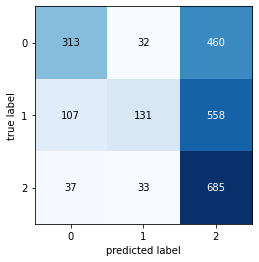

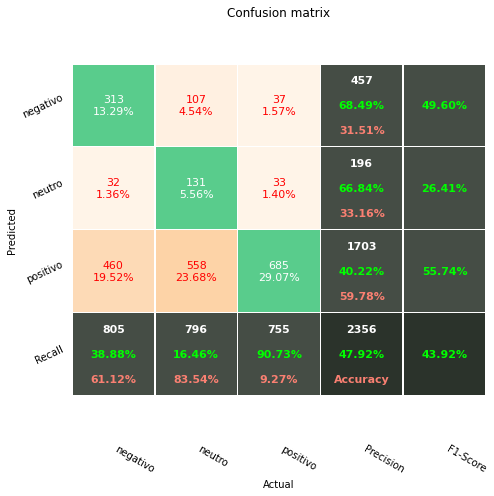

In [46]:
matriz_confusao(y_test_w2v, modelo1_pred_orig)

### Validação cruzada - modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.48      0.62      0.54      3926
           1       0.45      0.29      0.35      3926
           2       0.52      0.56      0.54      3926

    accuracy                           0.49     11778
   macro avg       0.49      0.49      0.48     11778
weighted avg       0.49      0.49      0.48     11778

Acurácia: 0.4903

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2431   704   791   3926
1        1566  1139  1221   3926
2        1040   681  2205   3926
All      5037  2524  4217  11778 


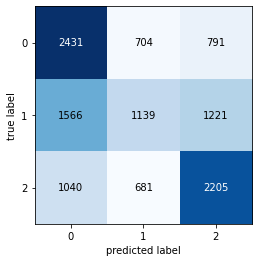

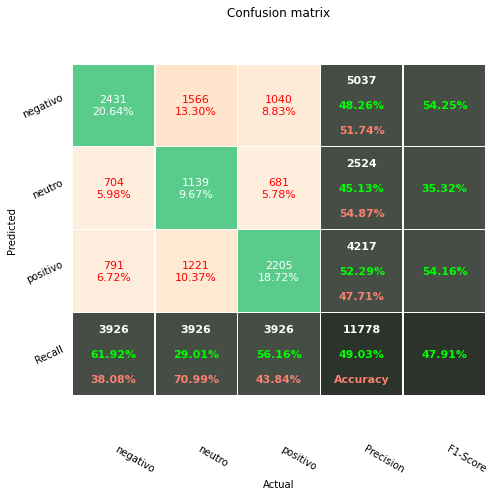

In [47]:
validacao_cruzada1 = cross_val_predict(modelo1_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada1)

## Modelo 2 (Word2vec e MultinomialNB)

In [48]:
# não funciona

'''
modelo2_orig = escolher_modelo(2)
modelo2_orig = modelo2_orig.fit(X_train_w2v, y_train_w2v)
modelo2_pred_orig = modelo2_orig.predict(X_test_w2v)

modelo2_pred_orig
'''

'\nmodelo2_orig = escolher_modelo(2)\nmodelo2_orig = modelo2_orig.fit(X_train_w2v, y_train_w2v)\nmodelo2_pred_orig = modelo2_orig.predict(X_test_w2v)\n\nmodelo2_pred_orig\n'

### Avaliando o modelo 2

In [49]:
#matriz_confusao(y_test_w2v, modelo2_pred_orig)

### Validação cruzada - modelo 2

In [50]:
'''
validacao_cruzada2 = cross_val_predict(modelo2_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada2)
'''

'\nvalidacao_cruzada2 = cross_val_predict(modelo2_orig, X, y, cv=10)\nmatriz_confusao(y, validacao_cruzada2)\n'

## Modelo 3 (Word2vec e RandomForest)

In [51]:
modelo3_orig = escolher_modelo(3)
modelo3_orig = modelo3_orig.fit(X_train_w2v, y_train_w2v)
modelo3_pred_orig = modelo3_orig.predict(X_test_w2v)

modelo3_pred_orig

array([2, 1, 2, ..., 1, 1, 0])

### Avaliando o modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.69      0.74      0.72       805
           1       0.58      0.55      0.57       796
           2       0.67      0.66      0.67       755

    accuracy                           0.65      2356
   macro avg       0.65      0.65      0.65      2356
weighted avg       0.65      0.65      0.65      2356

Acurácia: 0.6524

Matrix de confusão:
 Predito    0    1    2   All
Real                        
0        596  132   77   805
1        192  439  165   796
2         71  182  502   755
All      859  753  744  2356 


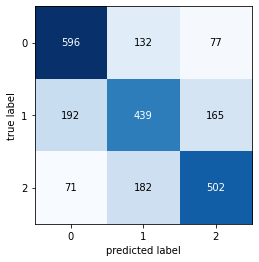

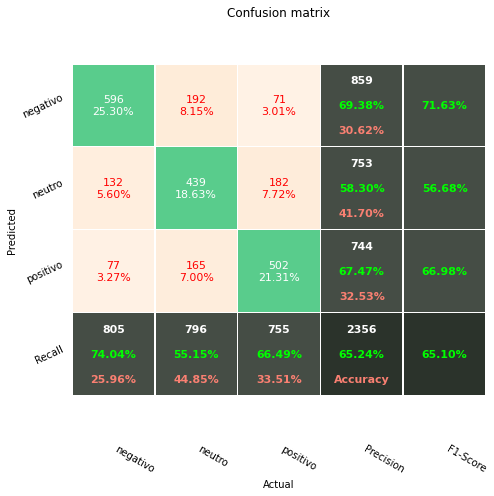

In [52]:
matriz_confusao(y_test_w2v, modelo3_pred_orig)

### Validação cruzada - modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.66      0.77      0.71      3926
           1       0.59      0.52      0.56      3926
           2       0.72      0.69      0.70      3926

    accuracy                           0.66     11778
   macro avg       0.66      0.66      0.66     11778
weighted avg       0.66      0.66      0.66     11778

Acurácia: 0.6599

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3014   656   256   3926
1        1078  2051   797   3926
2         466   753  2707   3926
All      4558  3460  3760  11778 


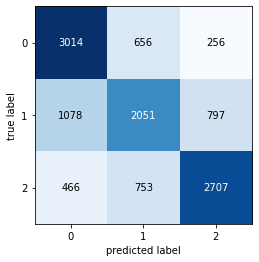

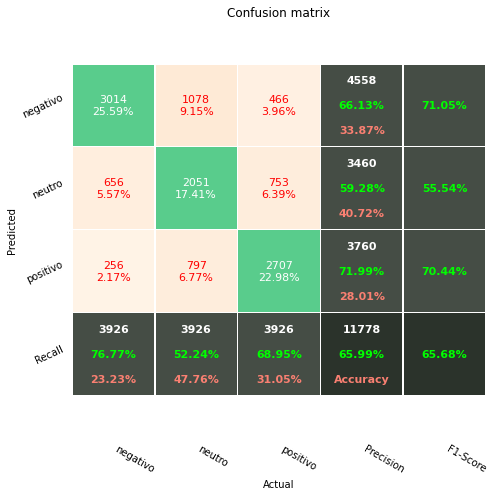

In [53]:
validacao_cruzada3 = cross_val_predict(modelo3_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada3)

## Modelo 4 (Word2vec e KNeighbors)

In [54]:
modelo4_orig = escolher_modelo(4)
modelo4_orig = modelo4_orig.fit(X_train_w2v, y_train_w2v)
modelo4_pred_orig = modelo4_orig.predict(X_test_w2v)

modelo4_pred_orig

array([2, 0, 1, ..., 1, 1, 0])

### Avaliando o modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.53      0.63      0.57       805
           1       0.49      0.54      0.51       796
           2       0.64      0.46      0.54       755

    accuracy                           0.54      2356
   macro avg       0.55      0.54      0.54      2356
weighted avg       0.55      0.54      0.54      2356

Acurácia: 0.5416

Matrix de confusão:
 Predito    0    1    2   All
Real                        
0        504  213   88   805
1        266  426  104   796
2        179  230  346   755
All      949  869  538  2356 


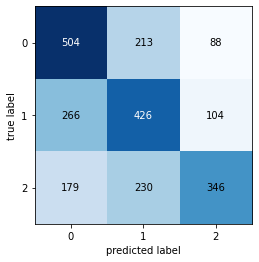

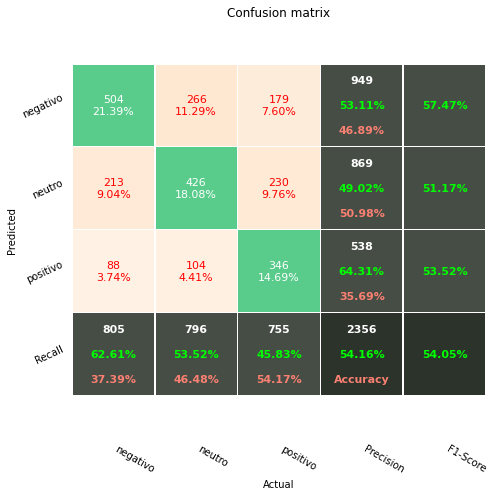

In [55]:
matriz_confusao(y_test_w2v, modelo4_pred_orig)

### Validação cruzada - modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.54      0.62      0.58      3926
           1       0.46      0.54      0.50      3926
           2       0.62      0.43      0.51      3926

    accuracy                           0.53     11778
   macro avg       0.54      0.53      0.53     11778
weighted avg       0.54      0.53      0.53     11778

Acurácia: 0.5290

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2441  1112   373   3926
1        1173  2114   639   3926
2         910  1340  1676   3926
All      4524  4566  2688  11778 


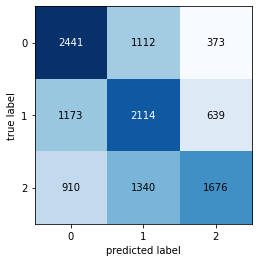

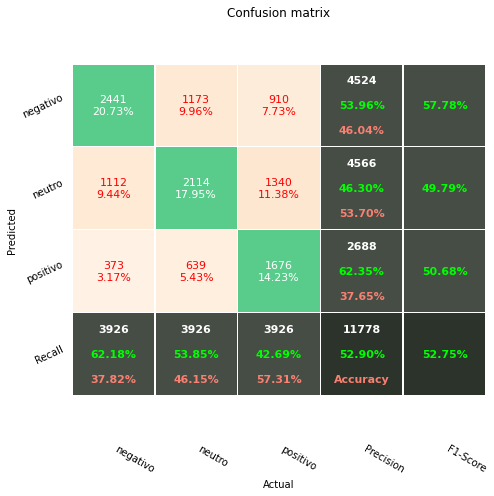

In [56]:
validacao_cruzada4 = cross_val_predict(modelo4_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada4)

## Modelo 5 (Word2vec e PassiveAggressive)

In [57]:
modelo5_orig = escolher_modelo(5)
modelo5_orig = modelo5_orig.fit(X_train_w2v, y_train_w2v)
modelo5_pred_orig = modelo5_orig.predict(X_test_w2v)

modelo5_pred_orig

array([1, 1, 1, ..., 1, 0, 1])

### Avaliando o modelo 5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.10      0.19       805
           1       0.38      0.93      0.54       796
           2       0.71      0.27      0.39       755

    accuracy                           0.44      2356
   macro avg       0.65      0.44      0.37      2356
weighted avg       0.65      0.44      0.37      2356

Acurácia: 0.4372

Matrix de confusão:
 Predito   0     1    2   All
Real                        
0        84   683   38   805
1         8   740   48   796
2         4   545  206   755
All      96  1968  292  2356 


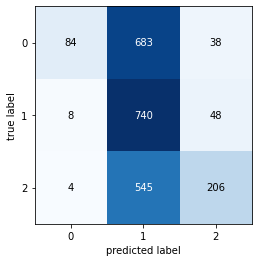

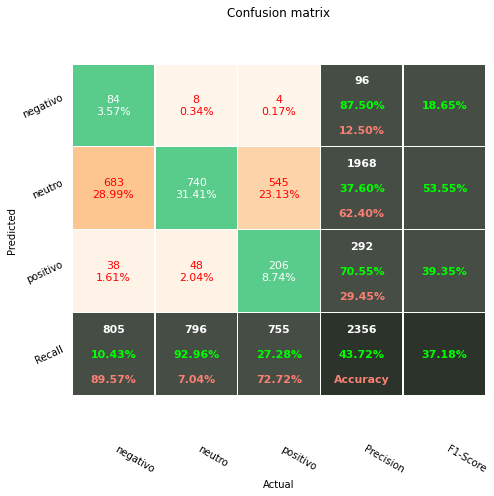

In [58]:
matriz_confusao(y_test_w2v, modelo5_pred_orig)

### Validação cruzada - modelo 5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44      3926
           1       0.42      0.42      0.42      3926
           2       0.43      0.52      0.47      3926

    accuracy                           0.45     11778
   macro avg       0.45      0.45      0.44     11778
weighted avg       0.45      0.45      0.44     11778

Acurácia: 0.4452

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        1568  1054  1304   3926
1         839  1633  1454   3926
2         724  1159  2043   3926
All      3131  3846  4801  11778 


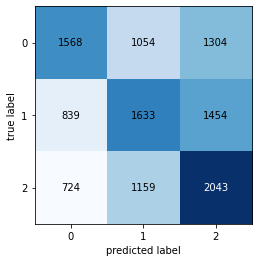

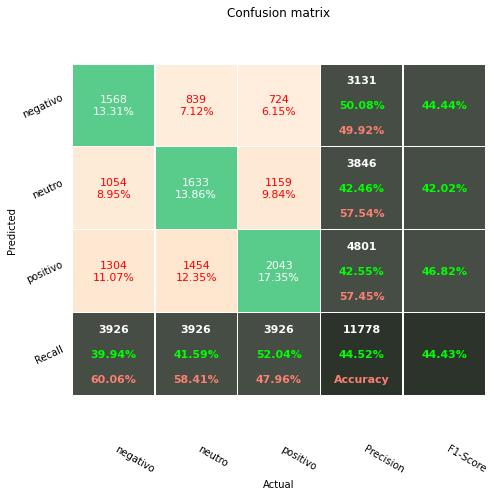

In [59]:
validacao_cruzada5 = cross_val_predict(modelo5_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada5)

## Modelo 6 (Word2vec e GradientBoosting)

In [60]:
modelo6_orig = escolher_modelo(6)
modelo6_orig = modelo6_orig.fit(X_train_w2v, y_train_w2v)
modelo6_pred_orig = modelo6_orig.predict(X_test_w2v)

modelo6_pred_orig

array([2, 2, 1, ..., 1, 0, 0])

### Avaliando o modelo 6

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63       805
           1       0.55      0.57      0.56       796
           2       0.65      0.64      0.65       755

    accuracy                           0.61      2356
   macro avg       0.61      0.61      0.61      2356
weighted avg       0.61      0.61      0.61      2356

Acurácia: 0.6112

Matrix de confusão:
 Predito    0    1    2   All
Real                        
0        505  185  115   805
1        202  452  142   796
2         94  178  483   755
All      801  815  740  2356 


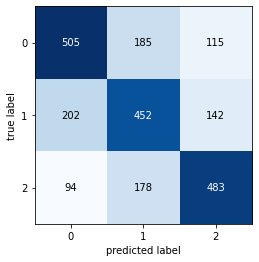

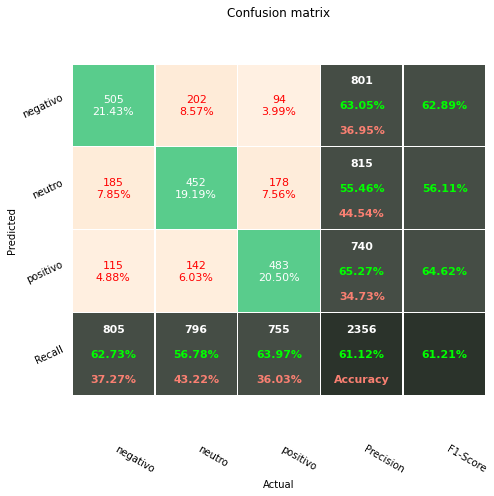

In [61]:
matriz_confusao(y_test_w2v, modelo6_pred_orig)

### Validação cruzada - modelo 6

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64      3926
           1       0.55      0.55      0.55      3926
           2       0.66      0.64      0.65      3926

    accuracy                           0.61     11778
   macro avg       0.61      0.61      0.61     11778
weighted avg       0.61      0.61      0.61     11778

Acurácia: 0.6122

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2542   896   488   3926
1         944  2171   811   3926
2         551   878  2497   3926
All      4037  3945  3796  11778 


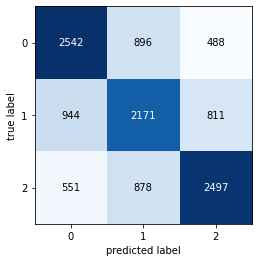

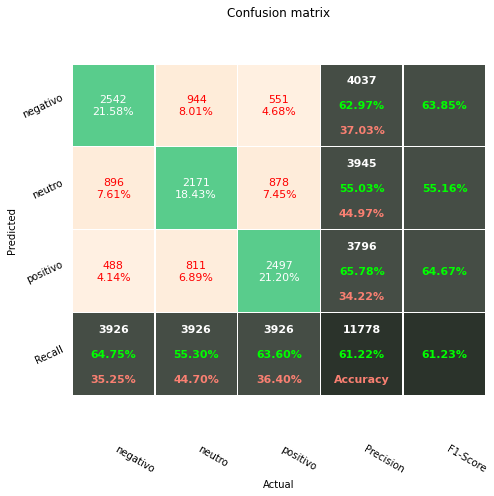

In [62]:
validacao_cruzada6 = cross_val_predict(modelo6_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada6)

## Modelo 7 (Word2vec e XGB)

In [63]:
modelo7_orig = escolher_modelo(7)
modelo7_orig = modelo7_orig.fit(X_train_w2v, y_train_w2v)
modelo7_pred_orig = modelo7_orig.predict(X_test_w2v)

modelo7_pred_orig

array([2, 2, 1, ..., 1, 0, 0])

### Avaliando o modelo 7

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.64      0.64       805
           1       0.55      0.55      0.55       796
           2       0.64      0.64      0.64       755

    accuracy                           0.61      2356
   macro avg       0.61      0.61      0.61      2356
weighted avg       0.61      0.61      0.61      2356

Acurácia: 0.6091

Matrix de confusão:
 Predito    0    1    2   All
Real                        
0        515  176  114   805
1        206  436  154   796
2         94  177  484   755
All      815  789  752  2356 


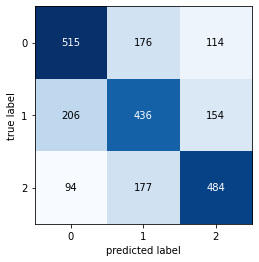

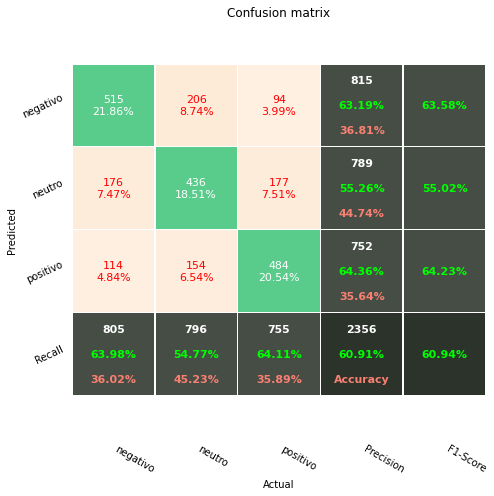

In [64]:
matriz_confusao(y_test_w2v, modelo7_pred_orig)

### Validação cruzada - modelo 7

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.62      0.64      0.63      3926
           1       0.54      0.54      0.54      3926
           2       0.65      0.62      0.63      3926

    accuracy                           0.60     11778
   macro avg       0.60      0.60      0.60     11778
weighted avg       0.60      0.60      0.60     11778

Acurácia: 0.6009

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2509   913   504   3926
1         971  2121   834   3926
2         592   887  2447   3926
All      4072  3921  3785  11778 


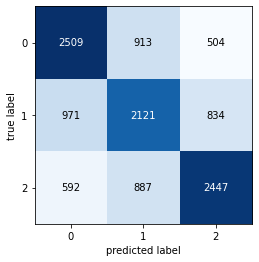

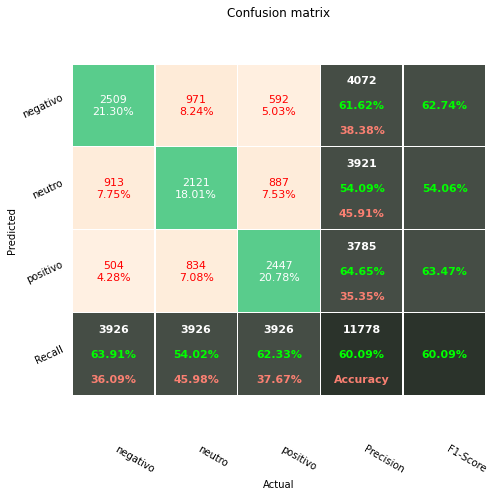

In [65]:
validacao_cruzada7 = cross_val_predict(modelo7_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada7)

## Modelo 8 (Word2vec e MLP)

In [66]:
modelo8_orig = escolher_modelo(8)
modelo8_orig = modelo8_orig.fit(X_train_w2v, y_train_w2v)
modelo8_pred_orig = modelo8_orig.predict(X_test_w2v)

modelo8_pred_orig

array([2, 2, 2, ..., 1, 0, 0])

### Avaliando o modelo 8

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.64      0.63      0.64       805
           1       0.54      0.58      0.56       796
           2       0.67      0.64      0.65       755

    accuracy                           0.61      2356
   macro avg       0.62      0.61      0.62      2356
weighted avg       0.62      0.61      0.62      2356

Acurácia: 0.6146

Matrix de confusão:
 Predito    0    1    2   All
Real                        
0        508  204   93   805
1        192  459  145   796
2         93  181  481   755
All      793  844  719  2356 


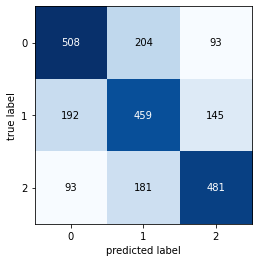

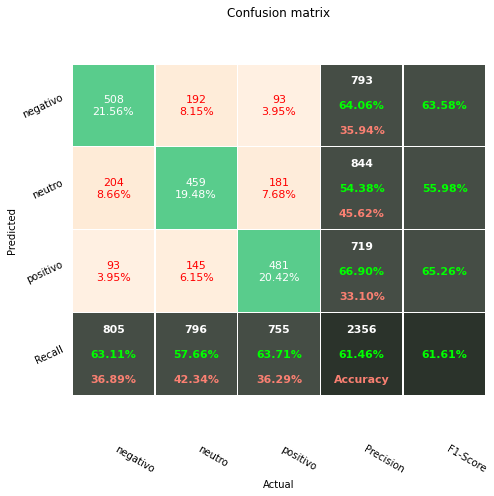

In [67]:
matriz_confusao(y_test_w2v, modelo8_pred_orig)

### Validação cruzada - modelo 8

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66      3926
           1       0.57      0.53      0.55      3926
           2       0.67      0.67      0.67      3926

    accuracy                           0.63     11778
   macro avg       0.63      0.63      0.63     11778
weighted avg       0.63      0.63      0.63     11778

Acurácia: 0.6278

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2676   811   439   3926
1        1004  2091   831   3926
2         524   775  2627   3926
All      4204  3677  3897  11778 


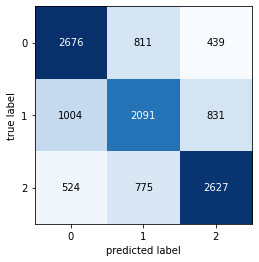

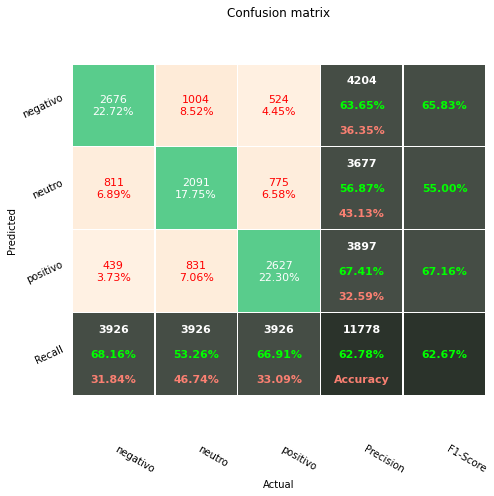

In [68]:
validacao_cruzada8 = cross_val_predict(modelo8_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada8)

## Modelo 9 (Word2vec e LogisticRegression)

In [69]:
modelo9_orig = escolher_modelo(9)
modelo9_orig = modelo9_orig.fit(X_train_w2v, y_train_w2v)
modelo9_pred_orig = modelo9_orig.predict(X_test_w2v)

modelo9_pred_orig

array([1, 2, 1, ..., 0, 0, 0])

### Avaliando o modelo 9

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.58      0.63      0.60       805
           1       0.53      0.51      0.52       796
           2       0.63      0.60      0.62       755

    accuracy                           0.58      2356
   macro avg       0.58      0.58      0.58      2356
weighted avg       0.58      0.58      0.58      2356

Acurácia: 0.5794

Matrix de confusão:
 Predito    0    1    2   All
Real                        
0        505  187  113   805
1        236  404  156   796
2        124  175  456   755
All      865  766  725  2356 


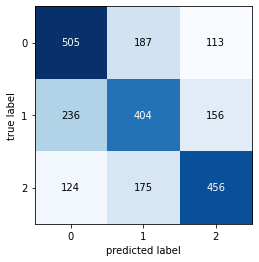

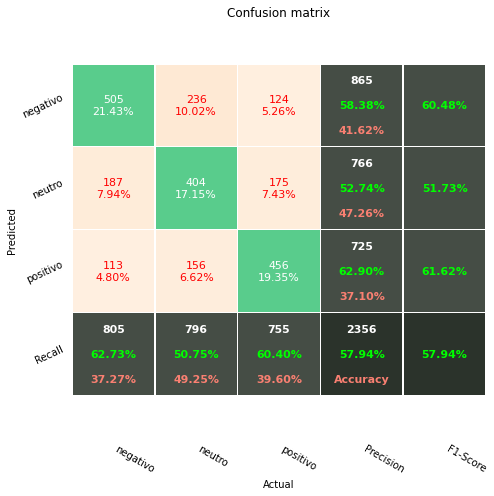

In [70]:
matriz_confusao(y_test_w2v, modelo9_pred_orig)

### Validação cruzada - modelo 9

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.57      0.62      0.59      3926
           1       0.52      0.51      0.52      3926
           2       0.63      0.59      0.61      3926

    accuracy                           0.57     11778
   macro avg       0.58      0.57      0.57     11778
weighted avg       0.58      0.57      0.57     11778

Acurácia: 0.5744

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2424   940   562   3926
1        1122  2015   789   3926
2         701   899  2326   3926
All      4247  3854  3677  11778 


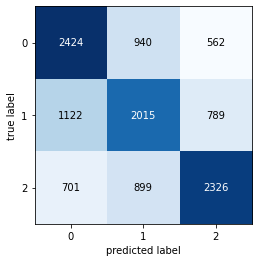

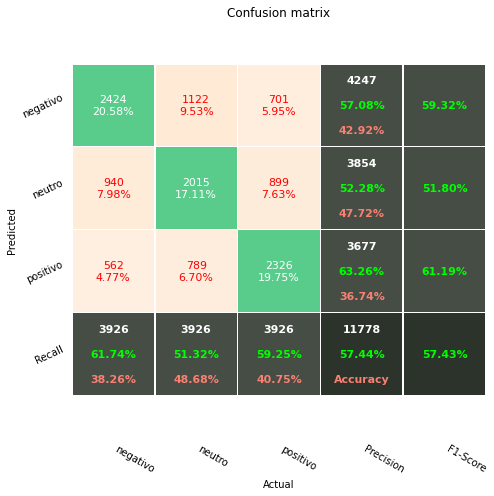

In [71]:
validacao_cruzada9 = cross_val_predict(modelo9_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada9)

## Modelo 10 (Word2vec e SVC)

In [72]:
modelo10_orig = escolher_modelo(10)
modelo10_orig = modelo10_orig.fit(X_train_w2v, y_train_w2v)
modelo10_pred_orig = modelo10_orig.predict(X_test_w2v)

modelo10_pred_orig

array([2, 2, 2, ..., 0, 2, 0])

### Avaliando o modelo 10

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.44      0.56      0.50       805
           1       0.47      0.21      0.29       796
           2       0.43      0.56      0.48       755

    accuracy                           0.44      2356
   macro avg       0.45      0.44      0.42      2356
weighted avg       0.45      0.44      0.42      2356

Acurácia: 0.4410

Matrix de confusão:
 Predito     0    1    2   All
Real                         
0         452   97  256   805
1         318  165  313   796
2         247   86  422   755
All      1017  348  991  2356 


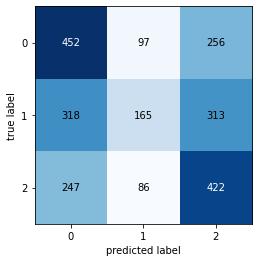

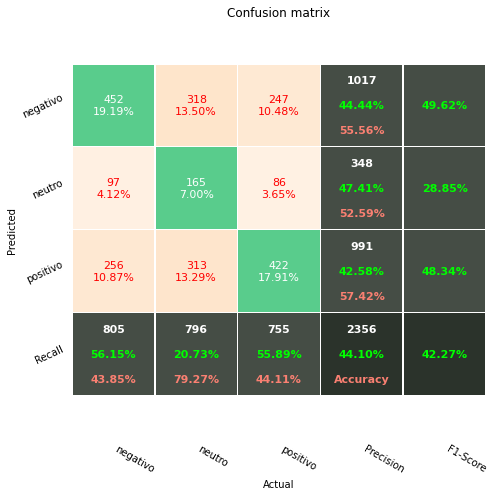

In [73]:
matriz_confusao(y_test_w2v, modelo10_pred_orig)

### Validação cruzada - modelo 10

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.46      0.62      0.53      3926
           1       0.48      0.28      0.35      3926
           2       0.48      0.52      0.50      3926

    accuracy                           0.47     11778
   macro avg       0.47      0.47      0.46     11778
weighted avg       0.47      0.47      0.46     11778

Acurácia: 0.4722

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2442   565   919   3926
1        1562  1088  1276   3926
2        1293   602  2031   3926
All      5297  2255  4226  11778 


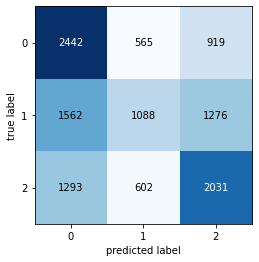

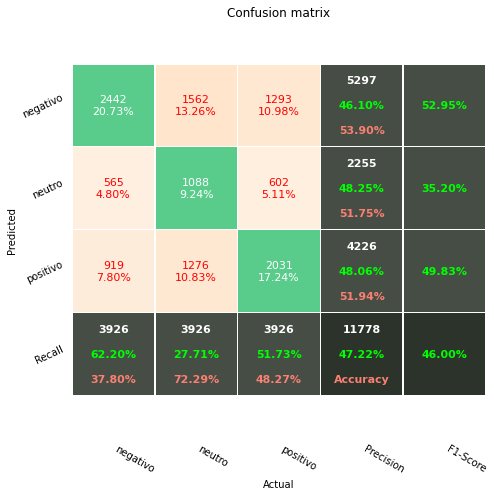

In [74]:
validacao_cruzada10 = cross_val_predict(modelo10_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada10)

## Gerando relatório dos modelos

In [75]:
# pegando o relatório de metricas dos modelos
report1 = metrics.classification_report(y_test_w2v, modelo1_pred_orig, output_dict=True)
# report2 = metrics.classification_report(y_test_w2v, modelo2_pred_orig, output_dict=True) não funciona
report3 = metrics.classification_report(y_test_w2v, modelo3_pred_orig, output_dict=True)
report4 = metrics.classification_report(y_test_w2v, modelo4_pred_orig, output_dict=True)
report5 = metrics.classification_report(y_test_w2v, modelo5_pred_orig, output_dict=True)
report6 = metrics.classification_report(y_test_w2v, modelo6_pred_orig, output_dict=True)
report7 = metrics.classification_report(y_test_w2v, modelo7_pred_orig, output_dict=True)
report8 = metrics.classification_report(y_test_w2v, modelo8_pred_orig, output_dict=True)
report9 = metrics.classification_report(y_test_w2v, modelo9_pred_orig, output_dict=True)
report10 = metrics.classification_report(y_test_w2v, modelo10_pred_orig, output_dict=True)

In [76]:
# criando o dataframe para o relatório consolidado
columns = ['modelo', 'prec_neg', 'prec_neu', 'prec_pos', 'rec_neg', 'rec_neu', 'rec_pos', 'f1_neg', 'f1_neu', 'f1_pos', 'f1_media', 'accuracy']
report_df = pd.DataFrame(columns=columns)

In [77]:
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,f1_media,accuracy


In [78]:
# MultinomialNB não funciona

# criando a lista com o modelos de classificação
modelos = ['SGD_word2vec',
            'RandomForest_word2vec',
            'KNeighbors_word2vec',
            'PassiveAggressive_word2vec',
            'GradientBoosting_word2vec',
            'XGB_word2vec',
            'MLP_word2vec',
            'LogisticRegression_word2vec',
            'SVC_word2vec']

In [79]:
# criando a lista com os relatórios individuais
reports = [report1, 
            report3,
            report4,
            report5,
            report6,
            report7,
            report8,
            report9,
            report10]

In [80]:
# loop para criação do relátorio consolidado
for i in range(len(modelos)):
    report_df.loc[i] = [modelos[i], 
                    round(reports[i]['0']['precision'], 2), 
                    round(reports[i]['1']['precision'], 2),
                    round(reports[i]['2']['precision'], 2),
                    round(reports[i]['0']['recall'], 2),
                    round(reports[i]['1']['recall'], 2),
                    round(reports[i]['2']['recall'], 2),
                    round(reports[i]['0']['f1-score'], 2),
                    round(reports[i]['1']['f1-score'], 2),
                    round(reports[i]['2']['f1-score'], 2),
                    round(reports[i]['weighted avg']['f1-score'],2),
                    round(reports[i]['accuracy'], 2)] 

In [81]:
report_df.sort_values(by='accuracy', ascending=False, inplace=True)
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,f1_media,accuracy
1,RandomForest_word2vec,0.69,0.58,0.67,0.74,0.55,0.66,0.72,0.57,0.67,0.65,0.65
4,GradientBoosting_word2vec,0.63,0.55,0.65,0.63,0.57,0.64,0.63,0.56,0.65,0.61,0.61
5,XGB_word2vec,0.63,0.55,0.64,0.64,0.55,0.64,0.64,0.55,0.64,0.61,0.61
6,MLP_word2vec,0.64,0.54,0.67,0.63,0.58,0.64,0.64,0.56,0.65,0.62,0.61
7,LogisticRegression_word2vec,0.58,0.53,0.63,0.63,0.51,0.60,0.60,0.52,0.62,0.58,0.58
2,KNeighbors_word2vec,0.53,0.49,0.64,0.63,0.54,0.46,0.57,0.51,0.54,0.54,0.54
0,SGD_word2vec,0.68,0.67,0.40,0.39,0.16,0.91,0.50,0.26,0.56,0.44,0.48
3,PassiveAggressive_word2vec,0.88,0.38,0.71,0.10,0.93,0.27,0.19,0.54,0.39,0.37,0.44
8,SVC_word2vec,0.44,0.47,0.43,0.56,0.21,0.56,0.50,0.29,0.48,0.42,0.44
